# Программирование на языке Python
## Семинар 26. Проверка гипотез: краткий обзор
### Содержание
![](images/all.png)

### Пререквизиты
![](images/e_disp.png)

![](images/continuity.png)

### Проверка гипотез? Зачем?
**Общий смысл**

- видим в данных какую-то закономерность
- думаем, как ее измерить
- насколько вероятно получить такое случайно?
- для ответа требуется: 1) понять, какие вообще результаты получаются случайно и 2) проверить, как соотносится с этим распределением полученное нами значение
- если укладывается - закономерность случайна, нет - отвергаем случайность закономерности

**Формализация**

1. Выдвигаем H0 (нулевая гипотеза) о том, что все случайно (Ha - альтернативная гипотеза - будет противоположна H0);
2. Выбираем статистику критерия (исходя из задачи и типа закономерности). Можем хоть сами придумать, главное чтобы она работала (вопрос: а как проверить что она работает?);
3. Подсчитываем наблюдаемую статистику критерия;
4. Подсчитываем вероятность получить ее по случайным причинам;
5. Оцениваем вероятность и делаем вывод.

**Что хотим получить и чего хотели бы избежать?**

![](https://i.redd.it/ob8za0yst6f21.png)


### Сравнение выборки с заданным распределением
#### t-тест и z-тест для одной выборки

![](https://i.ytimg.com/vi/PUm3oq2lQWs/maxresdefault.jpg)

In [2]:
theoretic_mean = 1.8
sample_mean = 2.3  #  несколько клыков
sample_std = 0.2
n = 6

In [ ]:
# H0: sample_mean == theoretic_mean (sample_mean - theoretic_mean == 0)

# HA: sample_mean != theoretic_mean (sample_mean - theoretic_mean != 0) - two-sided +++++++
# HA: sample_mean > theoretic_mean (sample_mean - theoretic_mean > 0) - right-sided
# HA: sample_mean < theoretic_mean (sample_mean - theoretic_mean < 0) - left-sided

# выдвинем проверямое следствие из этой гипотезы

# а как распределяется (metric = sample_mean - theoretic_mean) при верной H0
# если мы проведем с metric некоторые преобразования, то полученное значение (statistic) при выполнении некоторых условий

# **
# условие 1: выборка должна быть из нормального распределения
# условие 2: 
# **

# имеет хорошо известное и хорошо изученное распределение (при условии H0)
# в нашем случае это t-распределение

# statistic ~ t(df), df = n - 1, n - размер выборки (проверямое следствие из этой гипотезы)
# при n -> Inf (n > 1000), statistic ~ Z ~ N(0, 1)

# n > 1000, t-test -> Z-test

# metric / std(statistic)
# std(statistic) = std(X) / sample_size

In [4]:
statistic = (sample_mean - theoretic_mean) / (sample_std / n ** (1 / 2))
statistic  # наблюдаемое значение статистики 

6.1237243569579425

In [3]:
# укладывается ли значение статистики в теоретическое распределение?
# эта мера - p-value: вероятность получить такое же или более ЭКСТРЕМАЛЬНОЕ наблюдаемое значение статистики (при верной H0)
# ИЛИ это вероятность отвергнуть H0 при верное H0 (то есть ОШИБКА 1 РОДА)

6.1237243569579425

In [7]:
from scipy import stats

# проверим нулевую гипотезу против правосторонней альтернативы
# HA: sample_mean > theoretic_mean (sample_mean - theoretic_mean > 0) - right-sided

# p-value = 1 - F(statistic) = 1 - P(t <= statistic)

df = n - 1

t_distribution = stats.t(df)

p_value = 1 - t_distribution.cdf(statistic)
p_value

# p-value большое - значит проверямое следствие из гипотезы (H0) получить вероятно
# p-value маленькое - значит проверямое следствие из гипотезы (H0) получить маловероятно -> отвергаем нулевую гипотезу

# нужен порог: обычно это 0.05 -> отвергаем

0.0008423289851465787

In [8]:
# проверим нулевую гипотезу против левосторонней альтернативы
# HA: sample_mean < theoretic_mean (sample_mean - theoretic_mean < 0) - left-sided

# p-value = F(statistic)

df = n - 1

p_value = t_distribution.cdf(statistic)
p_value

# p-value большое - значит проверямое следствие из гипотезы (H0) получить вероятно
# p-value маленькое - значит проверямое следствие из гипотезы (H0) получить маловероятно -> отвергаем нулевую гипотезу

# нужен порог: обычно это 0.05 -> не отвергаем

0.9991576710148534

In [9]:
# проверим нулевую гипотезу против двусторонней альтернативы
# HA: sample_mean != theoretic_mean (sample_mean - theoretic_mean != 0) - two-sided

# p-value = F(-statistic) * 2

df = n - 1

p_value = t_distribution.cdf(-statistic) * 2
p_value

# p-value большое - значит проверямое следствие из гипотезы (H0) получить вероятно
# p-value маленькое - значит проверямое следствие из гипотезы (H0) получить маловероятно -> отвергаем нулевую гипотезу

# нужен порог: обычно это 0.05 -> не отвергаем

0.001684657970293156

**Задача из примера**

In [29]:
#1
value_observed = 2.3

mean = 1.8
std = 0.2

value_observed_st = (value_observed - mean) / std  # mean -> 0, std -> 1, N(1.8, 0.2) -> N(0, 1) -> Z

In [34]:
stnorm_distribution = stats.norm(0, 1)
stnorm_distribution.cdf(-value_observed_st) * 2

0.012419330651552315

In [36]:
#2
norm_distribution = stats.norm(1.8, 0.2)

(1 - norm_distribution.cdf(value_observed)) * 2

0.012419330651552318

**Как вообще распределяется выборочное среднее?**

In [2]:
import numpy as np

population = np.random.normal(-3, 9, 100000)
expectation = population.mean()

In [12]:
sample_size = 10
np.random.choice(population, sample_size)

array([  1.27506465,   1.58227485, -17.8189887 ,  -3.00399294,
       -24.7055506 ,  -9.41690828,   4.94289788,  -2.25777083,
         0.04558298,  -2.47115781])

In [14]:
def get_sample_means(sample_size, n_samples=10000):
    sample_means = []
    
    for i in range(n_samples):
        sample = np.random.choice(population, sample_size)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)

    return sample_means

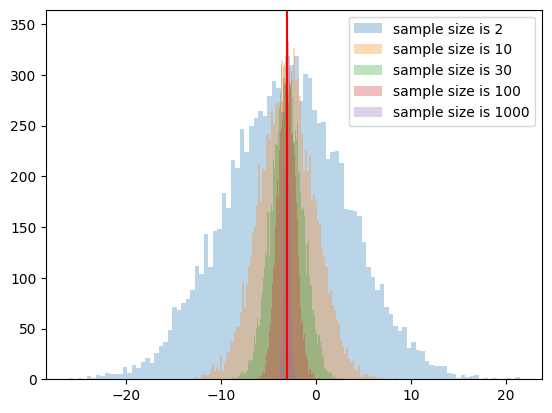

In [22]:
import matplotlib.pyplot as plt

sample_means10 = get_sample_means(100)

fig, ax = plt.subplots()
ax.axvline(expectation, color='red')

sample_sizes = [2, 10, 30, 100, 1000]

for sample_size in sample_sizes:
    sample_means = get_sample_means(sample_size)
    
    ax.hist(sample_means, bins=100, alpha=0.3, label=f'sample size is {sample_size}')

ax.legend();

**Свойства выборочного среднего**

1. при n_samples -> Inf, E(sample_mean) = E(X)
2. при sample_size -> Inf, sample_mean -> E(X)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

data = pd.read_excel('ess_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35987 entries, 0 to 35986
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     35987 non-null  object
 1   netusoft  35987 non-null  object
 2   ppltrst   35987 non-null  int64 
 3   clsprty   35987 non-null  object
 4   rlgatnd   35987 non-null  object
 5   gndr      35987 non-null  object
 6   agea      35987 non-null  int64 
 7   tporgwk   35987 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


$H_0: \mu_x=a$ <br>
$H_A: \mu \neq a$ <br>
$\mu$ - mean <br>
$a$ - some value

Допущения:
- X - количественная (numeric) переменная;
- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение.

1) Если на величину скорее всего влияют много слабых разнонаправленных факторов, она распределена нормально (рост, вес и т. д.);
2) Можно протестировать, вышла ли выборка из нормально распределенной генеральной совокупности.

In [33]:
norway_age = data.loc[data['cntry'] == 'Norway', 'agea'].values

In [34]:
sample_mean = norway_age.mean()
sample_std = norway_age.std(ddof=1)  # unbiased estimation
sample_mean

47.229046242774565

In [35]:
population_mean = 40

In [36]:
# H0: средний возраст жителей Норвегии на самом деле 40 лет
# HA: на самом деле не 40

# рассчитаем значение статистики
statistic = (sample_mean - population_mean) / (sample_std / norway_age.size ** (1 / 2))
statistic

14.786143270569728

In [37]:
# надо сравнить statistic с теоретическим распределением

norm_distribution = stats.norm(0, 1)
norm_distribution.cdf(-statistic) * 2  # p-value

1.7997513933815474e-49

In [38]:
stats.ttest_1samp(
    norway_age,
    population_mean,
    alternative='two-sided'
)

TtestResult(statistic=14.786143270569728, pvalue=4.849408790456409e-46, df=1383)

**Задание**

Найти такое теоретическое значения возраста, при котором нулевая гипотеза не отвергалась (при двусторонней альтернативе).

In [ ]:
1) statistic_i > 0
2) F(-statistic_i) * 2 >= 0.05  ->  F(-statistic_i) >= 0.025 (квантиль уровня 0.025)

In [26]:
statistic_i = norm_distribution.ppf(0.025)

In [27]:
statistic_i

-1.9599639845400545

In [30]:
# (sample_mean - population_mean) / (sample_std / norway_age.size ** (1 / 2)) = -1.9599639845400545
# (sample_mean - population_mean) = -1.9599639845400545 * (sample_std / norway_age.size ** (1 / 2))
population_mean_i = -1.9599639845400545 * (sample_std / norway_age.size ** (1 / 2)) + sample_mean

In [31]:
population_mean_i  # тот теоретический возраст, начиная с которого H0 могла бы быть корректной

46.27080648957171

### Парные наблюдения
#### Парный t-test

$H_0: \mu_{after}=\mu_{before}$ <br>
$H_A: \mu_{after} \neq \mu_{before}$ <br>
$\mu$ - mean <br>

Допущения:

- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение
- обе выборки представляют собой измерения одних и тех же объектов

In [4]:
from scipy import stats

#  BEFORE AFTER   DIFF
#1   3     3.4     0.4
#2   2.4   2.6     0.2
#3   3.2   3.3     0.1
#4   3.9   3.4     -0.5
#5   1.8   1.97    0.17

In [4]:
before = [3, 2.4, 3.2, 3.9, 1.8]
after = [3.4, 2.6, 3.3, 3.4, 1.97]

Сводим к одновыборочному t-тесту, где сравниваем среднее разницы с 0:

$H_0: \mu_{diff}=0$<br>

In [8]:
diff = np.array([0.4, 0.2, 0.1, -0.5, 0.17])

sample_mean = diff.mean()
sample_std = diff.std(ddof=1)
sample_size = diff.size

statistic = (sample_mean - 0) / (sample_std / sample_size ** (1 / 2))
statistic  # насколько вероятно получить такое же или более экстремальное значение статистики при условии верной H0

0.48713737841224136

In [9]:
df = sample_size - 1
t_distrib = stats.t(df)

In [10]:
t_distrib.cdf(-statistic) * 2

0.6516514312574402

In [5]:
stats.ttest_rel(
    before,
    after,
    alternative='two-sided'
)

TtestResult(statistic=-0.4871373784122409, pvalue=0.6516514312574404, df=4)

#### Критерий знаков

![](https://slideplayer.com/slide/6959440/24/images/4/Bernoulli+Distribution.jpg)

![](https://slideplayer.com/slide/5269821/17/images/24/Binomial+Distribution+Formula.jpg)

![](https://slideplayer.com/slide/17819162/106/images/60/4-7+Normal+Approximation+to+the+Binomial+and+Poisson+Distributions.jpg)

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов

In [ ]:
#  BEFORE AFTER   IF_SUCCESS (AFTER > BEFORE)
#1   3     3.4        1
#2   2.4   2.6        1
#3   3.2   3.3        1
#4   3.9   3.4        0
#5   1.8   1.97       1

In [46]:
# H0: нет никакого систематического увеличения AFTER по сравнению с BEFORE
# Ha: есть (one-sided)

# однозначно количество успехов - это про биномиальное распределение

# при верной H0: n = 5, p = 0.5

# насколько вероятно получить X и более экстремальное количество успехов при верной H0

# X = 4

# P(X = 4) + P(X = 5)

binom_distribution = stats.binom(5, 0.5)

In [ ]:
0, 1, 2, (2.5), 3, [4, 5]

In [48]:
binom_distribution.pmf([4, 5]).sum()  # p-value

0.1875

In [ ]:
# Ha: есть (two-sided)

# чтобы найти симметричное количество успехов (как в случае с симметричным значением t-статистики), надо для начала понять относительно чего
# смотреть (посчитать среднее)

# Bernoulli:
# E(X) = p
# Var(X) = p * (1 - p)

# Binomial:
# E(X) = n * p
# Var(X) = n * p * (1 - p)

In [49]:
5 * 0.5

2.5

In [ ]:
[0, 1], 2, (2.5), 3, [4, 5]

In [50]:
binom_distribution.pmf([0, 1, 4, 5]).sum()

0.37499999999999994

**Задача.** Рассмотрим одностороннюю (право) альтернативу. Есть ли у нас вообще на такой выборке возможность отвергнуть H0 (при пороговом p-value равном 0.05)?

In [ ]:
# самое "невероятное", экстремальное значение успехов для binom(5, 0.5) - это 5 успехов. Посчитаем p-value:

In [51]:
binom_distribution.pmf(5)

0.03125

In [ ]:
# есть ли вообще смысл использовать критерий знаков на выборках < 5

# посчитаем вероятность самого экстремального значения для n = 4:

In [54]:
stats.binom(4, 0.5).pmf(4)  # при n <= 4 мы вообще не имеем возможности отвергнуть H0 (при пороге 0.05)

0.0625

Критерий знаков при больших N:

In [56]:
a = np.random.normal(0, 1, 100)
b = np.random.normal(0, 1, 100)

In [57]:
n_success = (b > a).sum()
n_success

60

In [58]:
# при H0 количество успехов будет распределяться биномиально с параметрами:
n = a.size
p = 0.5

In [63]:
# аппроксимируем к стандартному нормальному распределению!
statistic = (n_success + 0.5 - n * p) / (n * p * (1 - p)) ** (1 / 2)
statistic  # из стандартного нормального распределения

2.1

In [65]:
# two-sided alternative
stats.norm(0, 1).cdf(-2.1) * 2

0.035728841125633085

In [ ]:
# для перехода от биномиального к стандартному нормальному:
(X - E(X)) / SD(X) ~ N(0, 1)

In [67]:
stats.binom(100, 0.5).pmf(np.arange(60, 101)).sum() * 2

0.05688793364098071

**Задача.** В тесте 6 вопросов. В каждом 4 варианта ответа. Чтобы получить зачет, Николаю надо правильно ответить хотя бы на три из шести. Какова вероятность того, что Николай сдаст не готовясь? Готовы ли вы встать на место Николая?

In [11]:
n = 6
p = 0.25

# P_final = P(x=3) + P(x=4) + P(x=5) + P(x=6)

In [15]:
binom_distribution = stats.binom(n, p)

In [16]:
successes = [3, 4, 5, 6]

binom_distribution.pmf(successes).sum()

0.1694335937499999

**Биномиальное распределение может быть аппроксимировано к нормальному:**

In [19]:
def get_binomial_probs(n, p):
    binom_distribution = stats.binom(n, p)
    outcomes = np.arange(n + 1)

    return outcomes, binom_distribution.pmf(outcomes)

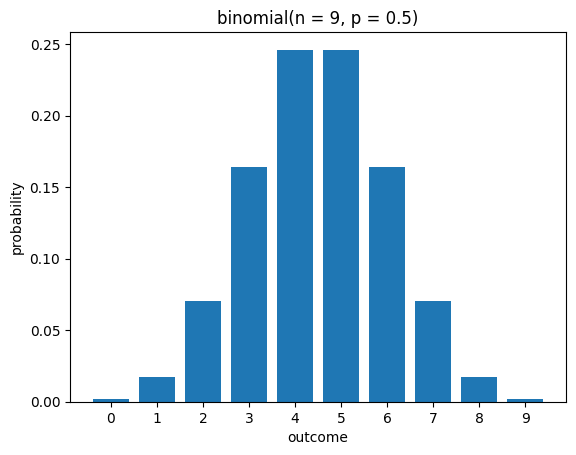

In [26]:
import matplotlib.pyplot as plt

n = 9
p = 0.5

fig, ax = plt.subplots()

outcomes, probs = get_binomial_probs(n, p)
ax.bar(outcomes, probs)
ax.set_xticks(outcomes, outcomes)

ax.set_xlabel('outcome')
ax.set_ylabel('probability')

ax.set_title(f'binomial(n = {n}, p = {p})');

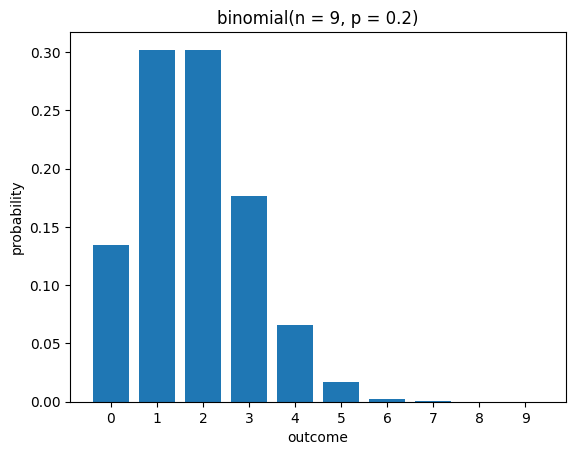

In [28]:
n = 9
p = 0.2

fig, ax = plt.subplots()

outcomes, probs = get_binomial_probs(n, p)
ax.bar(outcomes, probs)
ax.set_xticks(outcomes, outcomes)

ax.set_xlabel('outcome')
ax.set_ylabel('probability')

ax.set_title(f'binomial(n = {n}, p = {p})');

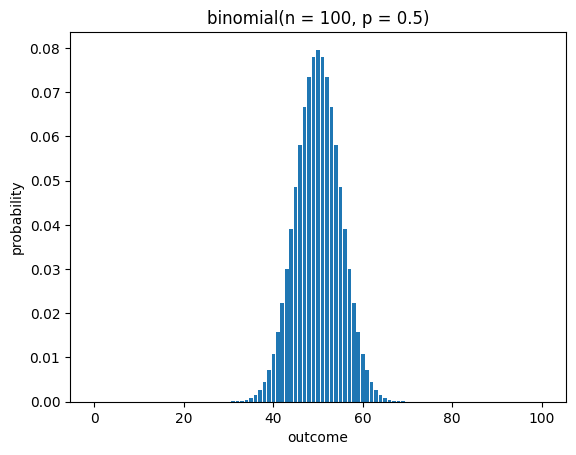

In [30]:
n = 100
p = 0.5

fig, ax = plt.subplots()

outcomes, probs = get_binomial_probs(n, p)
ax.bar(outcomes, probs)
# ax.set_xticks(outcomes, outcomes)

ax.set_xlabel('outcome')
ax.set_ylabel('probability')

ax.set_title(f'binomial(n = {n}, p = {p})');

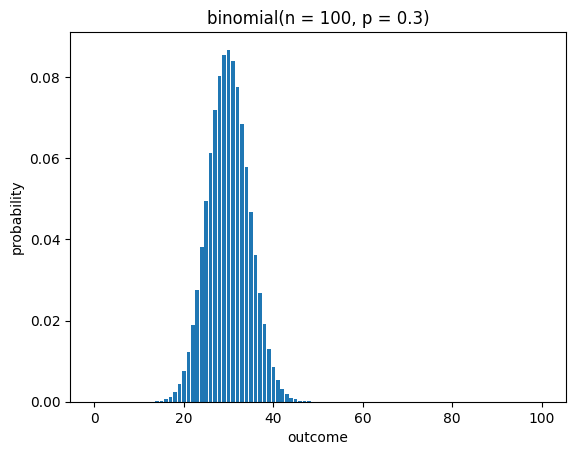

In [31]:
n = 100
p = 0.3

fig, ax = plt.subplots()

outcomes, probs = get_binomial_probs(n, p)
ax.bar(outcomes, probs)
# ax.set_xticks(outcomes, outcomes)

ax.set_xlabel('outcome')
ax.set_ylabel('probability')

ax.set_title(f'binomial(n = {n}, p = {p})');

#### Парный критерий Уилкоксона

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов
- значения разности должы быть вариативны (т. е. не -1/0/1: для таких случаев лучше критерий знаков)
- n >= 5. При этом случаи, когда разность равна 0, исключаются из подсчета статистики

Подробнее см. [тут](https://medstatistic.ru/methods/methods3.html).

In [ ]:
#  BEFORE AFTER   DIFF   RANK
#1   3     3.4     0.4     4
#2   2.4   2.6     0.2     3
#3   3.2   3.3     0.1     1
#4   3.9   3.4     -0.5    0
#5   1.8   1.97    0.17    2

In [ ]:
# критерий знаков:     0.19
# t-test:              0.65
# критерий вилкоксона: 0.625

In [6]:
stats.wilcoxon(
    before,
    after,
    alternative='two-sided'
)

WilcoxonResult(statistic=5.0, pvalue=0.625)

### Сравнение двух выборок
#### Двухвыборочный t-test (не путать с парным)
![](https://cdn1.qualitygurus.com/wp-content/uploads/2022/12/Two-sample-t-test-formulas.png?lossy=1&ssl=1)

$H_0: \mu_x = \mu_y$ <br>
$H_A: \mu_x \neq \mu_y$ <br>

Допущения:

- X и Y имеют нормальное распределение

**Как вы думаете, что будет, если вместо этого теста использовать парный критерий?**

In [2]:
age_male = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Male'), 'agea'].values
age_female = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Female'), 'agea'].values

In [3]:
age_male.mean(), age_female.mean()

(47.77574047954866, 46.65481481481481)

In [4]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

#### F-тест о равенстве дисперсий
Имеется и непараметрический вариант: Levene test.
![](https://image.slideserve.com/963492/f-test-example-solution1-l.jpg)

Допущения:

- X и Y имеют нормальное распределение

In [12]:
vars = []

for i in range(100000):
    sample1 = np.random.normal(0, 1, 100)
    sample2 = np.random.normal(5, 1, 100)

    vars.append(sample1.var(ddof=1) / sample2.var(ddof=1))

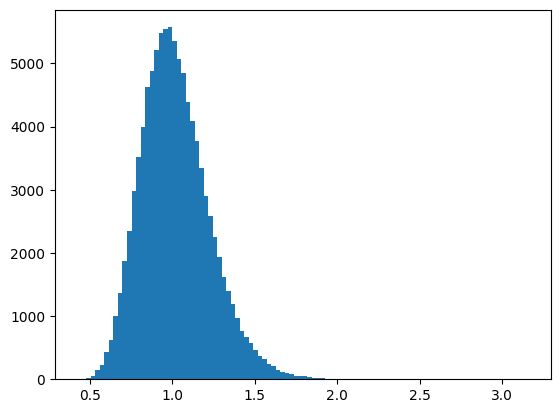

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(vars, bins=100);

In [16]:
def f_test(sample1, sample2):
    var1 = sample1.var(ddof=1)
    var2 = sample2.var(ddof=1)

    if var1 >= var2:
        statistic = var1 / var2
    else:
        statistic = var2 / var1

    df1 = sample1.size - 1
    df2 = sample2.size - 1

    f_distrib = stats.f(df1, df2)

    p_value = 1 - f_distrib.cdf(statistic)

    return statistic, p_value

In [17]:
# имеем ли мы право поставить ниже True в аргумент equal_var?
f_test(
    age_male,
    age_female
)  # H0 не отвергается, нет причин поставить не True

(1.0892965881947765, 0.13087787094441605)

In [18]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=True
)

TtestResult(statistic=1.1461431790107866, pvalue=0.2519343265853811, df=1382.0)

In [19]:
stats.levene(
    age_male,
    age_female
)

LeveneResult(statistic=2.173100611732319, pvalue=0.1406705603208207)

#### Критерии Уилкоксона и Манна-Уитни
![](images/wilcox.png)
![](images/mann_whitney.png)

In [5]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

In [6]:
stats.mannwhitneyu(
    age_male,
    age_female,
    alternative='two-sided'
)

MannwhitneyuResult(statistic=247264.0, pvalue=0.28312057544024005)

#### Критерий Колмогорова-Смирнова

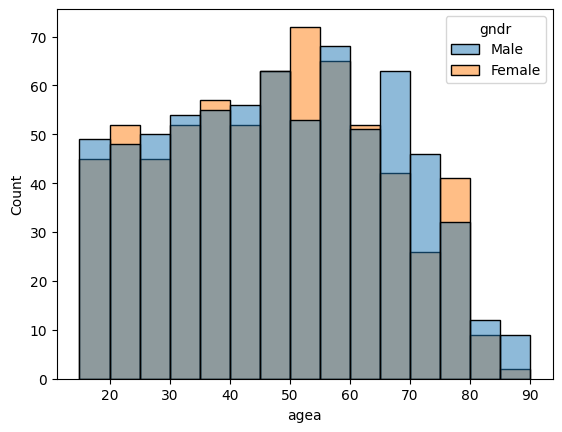

In [8]:
import seaborn as sns

sns.histplot(data=data[data['cntry'] == 'Norway'], x='agea', hue='gndr');

In [7]:
# возраст мужчин и женщин имеет равную дисперсию и средние. Может, эти две выборки пришли из одной и той же генеральной совокупности?

# H0: из одного распределения
# Ha: не из одного распределения
stats.kstest(
    age_male,
    age_female
)

KstestResult(statistic=0.051210364101760435, pvalue=0.3100250775915103, statistic_location=65, statistic_sign=-1)

### Сравнение многих выборок
#### ANOVA (он же однофакторный дисперсионный анализ)
![](https://i.pinimg.com/originals/eb/94/f9/eb94f9bae12be2d6617549bd22e7d216.jpg)
![](./images/anova.png)

$H_0: \mu_{x_1} = \mu_{x_2} = ... = \mu_{x_n}, X \sim N(\mu, \delta)$<br>
$H_A: \mu_{x_1} \neq \mu_{x_2} \neq ... \neq \mu_{x_n}, X \sim N(_, \delta)$

**Допущения.**
1. Количественный непрерывный тип данных, дискретные данные менее желательны.
2. Независимые между собой выборки.
3. Нормальное распределение признака в генеральных совокупностях, из которых извлечены выборки.
4. Равенство (гомогенность) дисперсий изучаемого признака в генеральных совокупностях, из которых извлечены выборки.
5. Независимые наблюдения в каждой из выборок.

**Вопрос.** Отличается ли вообще возраст во всех представленных в данных странах?

In [9]:
data.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Belgium,Every day,6,No,Once a week,Female,16,Not applicable
1,Belgium,Every day,3,No,Never,Female,24,A private firm
2,Belgium,Every day,6,Yes,Never,Male,58,A private firm
3,Belgium,Every day,7,No,Never,Male,35,Other
4,Belgium,Every day,3,No,Never,Male,61,Other public sector (such as education and hea...


In [12]:
Xij = [series.values for group, series in data.groupby('cntry')['agea']]

In [11]:
mu = data['agea'].mean()
mu_i = data.groupby('cntry')['agea'].mean().values

In [23]:
s0 = np.concatenate([(xij - mui) ** 2 for xij, mui in zip(Xij, mu_i)]).sum() / (data.groupby('cntry').size().values.sum() - data['cntry'].nunique())

In [24]:
s1 = (data.groupby('cntry').size().values * (mu - mu_i) ** 2).sum() / (data['cntry'].nunique() - 1)

In [25]:
s1 / s0

21.134386131194912

In [26]:
stats.f_oneway(*Xij)  # H0 отвергается

F_onewayResult(statistic=21.134386131194894, pvalue=2.623811625933467e-80)

In [27]:
mu_i

array([49.02108434, 52.68146718, 50.17905405, 48.23954849, 51.68149117,
       52.66921606, 49.55856325, 50.30888469, 50.60982659, 50.24376417,
       53.56975381, 51.63011998, 51.30304956, 47.50043066, 48.67545076,
       51.55855856, 47.22904624, 53.8661773 , 53.13083397, 49.35515548,
       49.66825613, 55.71855761])

#### Kruskal Wallis Test (критерий Краскелла-Уоллиса)
Минус допущение о нормальности генеральных совокупностей. Однако, этот критерий служит только для проверки сдвига!

In [28]:
stats.kruskal(*Xij)  # H0 отвергается

KruskalResult(statistic=422.81394650307897, pvalue=1.7429411866934363e-76)

#### Бонус: поправка на множественное сравнение
**Задача 1.** Представим себе, что мы рассматриваем среднюю ожидаемую продолжительность жизни в 10 российских регионах. Нам интересно, насколько она разная. Сколько сравнений нам надо сделать?

In [22]:
np.arange(1, 10).sum()  # 45 сравнений

45

**Задача 2.** Представим, что мы выбрали порог для p-value равный 0.05. Какова вероятность ни разу не словить ошибку 1 рода за все 45 сравнений?

In [21]:
# binom:
n = 45
p = 0.05  # успех - совершение ошибки I рода

In [23]:
stats.binom(n, p).pmf(0)  # это маленькая вероятность, а мы ведь хотел совершать ошибку I рода не чаще, чем 5% раз

0.09944025698709248

**Задача 3.** Видно, что надо сделать поправку к нашему p-value. Иными словами, каким оно должно быть, чтобы за 45 повторений мы словили ошибку I рода не более 5% раз?

In [26]:
p_current = p
prob = stats.binom(n, p_current).pmf(0)

while prob < 0.95:
    p_current += - 1e-4
    prob = stats.binom(n, p_current).pmf(0)

In [27]:
p_current  # тот савый порог p-value, который мы должны использовать для каждой пары, чтобы наше изначальное желание ошибаться не более 5%
# раз было удовлетворено

0.0010999999999996015

Сейчас мы сделали т. н. поправку на множественное сравнение (тестирование).

In [28]:
# поправка Bonferroni: p-value_cutoff / n
0.05 / 45

0.0011111111111111111

**Задача 4.** Выполните множественное сравнение парными t-тестами с поправкой. Можно ли сказать, что в разных странах средние значения возраста мужчин и женщин одинаковы?

In [46]:
result = []

for country, df in data.groupby('cntry'):
    male = df.loc[df['gndr'] == 'Male', 'agea'].values
    female = df.loc[df['gndr'] == 'Female', 'agea'].values
    
    result.append([country, stats.ttest_ind(male, female, equal_var=False).pvalue])

In [47]:
result_df = pd.DataFrame(result, columns=['country', 'p_value'])
result_df['signif'] = result_df['p_value'] < 0.05
result_df['signif_adj'] = result_df['p_value'] < (0.05 / result_df['country'].size)

In [49]:
result_df[['signif', 'signif_adj']].sum()

signif        9
signif_adj    5
dtype: int64

### Сравнение выборки с заданным распределением
#### Полиномиальный тест

#### Критерий согласия Chi-squared
![](https://cf2.ppt-online.org/files2/slide/p/p1fDJoE9zLG0R5OgWv4PtcSihTYa2unFX6qwdm8QVU/slide-38.jpg)

Критерий согласия хи-квадрат применим, только если ожидаемое значение в каждой ячейке больше 5, а общее количество объектов не менее 20.

**Задача.** Есть 5 магазинов. В каждом из них за день продано определенное количество товара. Надо проверить, есть ли разница между магазинам в продажах?

In [53]:
# H0: значения пришли из одного дискретного распределения
# Ha: !H0

sales = np.array([60, 54, 32, 43, 71])
sales_mean = sales.mean()

statistic = ((sales - sales_mean) ** 2).sum() / sales_mean
statistic

17.5

In [54]:
df = sales.size - 1

1 - stats.chi2(df).cdf(statistic)

0.0015449979198786101

**Задача.** Есть ли значимые отличия в количестве респондентов в разных странах?

In [ ]:
# наш код здесь

#### Критерий Колмогорова
Проверка совпадения распределений генеральной совокупностей двух выборок:

In [50]:
# распределен ли возраст мужчин в Норвегии нормально с параметрами sample_mean, sample_var
stats.kstest(
    rvs=age_male,
    cdf=stats.norm.cdf, args=(age_male.mean(), age_male.std(ddof=1))
)  # H0 отвергается -> возраст мужчин в Норвегии не распределен нормально

KstestResult(statistic=0.06220106463965877, pvalue=0.00792628715801556, statistic_location=30, statistic_sign=1)

### Таблица сопряженности
#### Точный тест Фишера
Если матрица 2 * 2

In [60]:
crosstab = pd.crosstab(norway_data['clsprty'], norway_data['gndr'])

In [61]:
stats.fisher_exact(crosstab)

SignificanceResult(statistic=1.0293462286066468, pvalue=0.8201536989824305)

#### Критерий Chi-squared
![](https://www.statstest.com/wp-content/uploads/2020/10/Chi-Square-Test-of-Independence-1.jpg)

Теперь рассматриваем взаимодействие двух категориальных переменных.

In [56]:
norway_data = data[data['cntry'] == 'Norway'].reset_index(drop=True)

In [31]:
norway_data.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Norway,Every day,7,No,Less often,Male,55,A private firm
1,Norway,Every day,9,Yes,Less often,Female,58,Other public sector (such as education and hea...
2,Norway,Every day,8,No,Only on special holy days,Female,35,Other public sector (such as education and hea...
3,Norway,Every day,3,No,Never,Male,18,A private firm
4,Norway,Every day,3,Yes,Only on special holy days,Male,22,A private firm


In [57]:
# как связаны между собой наличие политических предпочтений и пол?
crosstab = pd.crosstab(norway_data['clsprty'], norway_data['gndr'])

In [59]:
crosstab

gndr,Female,Male
clsprty,,
No,230,237
Yes,445,472


In [58]:
# какая доля мужчин и женщин (не) имеет политических предпочтений?
pd.crosstab(norway_data['clsprty'], norway_data['gndr'], normalize=1)

gndr,Female,Male
clsprty,,
No,0.340741,0.334274
Yes,0.659259,0.665726


Чтобы проверить, значимы ли эти различия, мы можем использовать т. н. критерий Chi-2.

Та таблица, которую мы имеем, - это наблюдаемая таблица. Но какую мы ожидали бы увидеть при условии H0?

H0: между переменными нет связи<br>
Ha: она есть

**Алгоритм:**

1) Построить таблицу с ожидаемыми частотами;
2) Посчитать "расстояние" между ожидаемой таблицей и наблюдаемой;
3) Расстояние будет иметь chi-2 распределение, нам останется посчитать p-value.

In [41]:
crosstab

gndr,Female,Male
clsprty,,
No,230,237
Yes,445,472


In [43]:
chi2_test = stats.chi2_contingency(crosstab)

In [44]:
chi2_test.expected_freq

array([[227.76372832, 239.23627168],
       [447.23627168, 469.76372832]])

In [45]:
chi2_test.statistic

0.038994863771994

In [46]:
chi2_test.pvalue

0.8434588386642923

### Сравнение чисел наблюдений
#### Число успехов при заданном числе испытаний
Проверим предыдущую гипотезу, но другим способом. Пусть имеется $n$ успехов при $N$ испытаниях и $m$ успехов при $M$ испытаниях.

$H_0:$ доля успехов в двух случаях одна и та же<br>
$H_A:$ доли успехов в двух случаях различаются

Тогда при верной $H_0:$

$p=\frac{n + m}{N + M}$<br><br>
$D_1=\frac{p(1-p)}{N}$<br>
$D_2=\frac{p(1-p)}{M}$<br><br>
$Z=\frac{\frac{n}{N} - \frac{m}{M}}{\sqrt{D_1 + D_2}}$

In [ ]:
# наш код здесь

#### Число успехов при неопределенном максимуме
![poisson](https://cf.ppt-online.org/files/slide/m/MI9r1WpmVsd8JtknYfC4KRUSoc5QGADiTuezyO/slide-9.jpg)
**Задача.** Мальчик поймал за сезон 50 рыжих майских жуков и 33 чёрных. Можно ли утверждать, что рыжие встречаются в этом году чаще?

$D_1=\frac{n + m}{2}$<br>
$D_2=\frac{n + m}{2}$<br><br>

$Z=\frac{n - m}{\sqrt{D_1 + D_2}}=\frac{n - m}{\sqrt{n + m}}$

**!NB!** Данный способ может применяться только при достаточно большом среднем (> 20).

In [ ]:
# наш код здесь

### Сравнение коэффициента корреляции с нулем
$H_0:$ корреляция равна 0<br>
$H_A:$ корреляция не равна 0

Теперь взаимодействуют две числовые переменные:

In [ ]:
# numeric & numeric
# ppltrst - степень доверия случайным людям от 0 до 10
# agea

In [62]:
# выборки происходят из нормальных генеральных совокупностей
stats.pearsonr(norway_data['agea'], norway_data['ppltrst'])

PearsonRResult(statistic=0.15900242188850106, pvalue=2.7183164677164256e-09)

In [63]:
# выборки НЕ ОБЯЗАТЕЛЬНО происходят из нормальных генеральных совокупностей (больше для РАНГОВЫХ данных)
stats.spearmanr(norway_data['agea'], norway_data['ppltrst'])

SignificanceResult(statistic=0.17812730502508442, pvalue=2.486273813337128e-11)

In [64]:
# выборки НЕ ОБЯЗАТЕЛЬНО происходят из нормальных генеральных совокупностей (ТОЛЬКО для РАНГОВЫХ данных)
stats.kendalltau(norway_data['agea'], norway_data['ppltrst'])

SignificanceResult(statistic=0.1316238639494908, pvalue=1.5937051688443437e-11)